In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
from exp.nb_00 import *
import operator

In [3]:
def test(a,b,cmp,cname=None):
    if cname is None: cname = cmp.__name__
    assert cmp(a,b),f"{cname}:\n{a}\n{b}"
    
def test_eq(a,b): test(a,b,operator.eq, "==")

In [5]:
test_eq(TEST,'Test')

# Get data

In [7]:
#export
from pathlib import Path
from IPython.core.debugger import set_trace
from fastai import datasets
import pickle, gzip, math, torch,matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor

MNIST_URL = 'http://deeplearning.net/data/mnist/mnist.pkl'

In [8]:
path = datasets.download_data(MNIST_URL, ext=".gz"); path

PosixPath('/home/guy/.fastai/data/mnist.pkl.gz')

In [16]:
with gzip.open(path,'rb') as f:
    ((x_train, y_train),(x_valid,y_valid), _) = pickle.load(f, encoding='latin-1')

In [27]:
x_train,y_train,x_valid,y_valid = map(tensor, (x_train, y_train,x_valid,y_valid))

n,c = x_train.shape

/home/guy/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


In [29]:
#some tests:
assert n==y_train.shape[0]==50000
test_eq(c,28**2)
test_eq(y_train.min(),0)
test_eq(y_train.max(),9)

In [30]:
mpl.rcParams['image.cmap'] = 'gray'

In [31]:
img = x_train[0]
img.view(28,28).type()

'torch.FloatTensor'

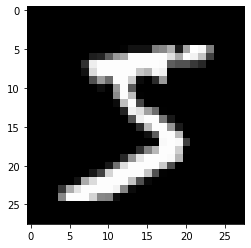

In [33]:
plt.imshow(img.view((28,28)))

In [34]:
weights = torch.randn(784,10)
bias = torch.zeros(10)

# Matrix Multiplication

In [105]:
# def matmul(a,b):
#     ar,ac = a.shape
#     br,bc = b.shape
#     assert ac==br
#     c = torch.zeros(ar,bc)
#     for i in range(ar):
#         c[i] = (a[i,None]*b).sum(dim=0)
#     return c

def matmul(a,b): torch.einsum('ij,jk->ik',a,b)

In [47]:
m1 = x_valid[:5]
m2 = weights

In [56]:
(m1[0,:]*m2[:,0]).shape

torch.Size([784])

In [48]:
m1.shape,m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [57]:
%time t1 = matmul(m1,m2)

CPU times: user 2.43 ms, sys: 0 ns, total: 2.43 ms
Wall time: 2.05 ms


In [45]:
t1.shape

torch.Size([5, 10])

Forbenius Norm:

$$\|A\| = \left(\sum_{i,j=1}^n | a_{i,j} |^2 \right)^{1/2}$$

In [58]:
#export
def near(a,b): return torch.allclose(a,b,rtol=1e-3,atol=1e-5)
def test_near(a,b): test(a,b,near)